## Load Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
receivals = pd.read_csv('../../data/kernel/receivals.csv')
purchase_orders = pd.read_csv('../../data/kernel/purchase_orders.csv')

# Convert date_arrival to datetime
receivals["date_arrival"] = pd.to_datetime(
    receivals["date_arrival"], errors="coerce", utc=True
)

# Convert delivery_date, created_date_time and modified_date_time to datetime
purchase_orders["delivery_date"] = pd.to_datetime(
    purchase_orders["delivery_date"], errors="coerce", utc=True
)
purchase_orders["created_date_time"] = pd.to_datetime(
    purchase_orders["created_date_time"], errors="coerce", utc=True
)
purchase_orders["modified_date_time"] = pd.to_datetime(
    purchase_orders["modified_date_time"], errors="coerce", utc=True
)

## General Info

### Print head Receivals

In [55]:
# Check first few rows of the datasets
print(receivals.head())

   rm_id  product_id  purchase_order_id  purchase_order_item_no  \
0  365.0  91900143.0           208545.0                    10.0   
1  365.0  91900143.0           208545.0                    10.0   
2  365.0  91900143.0           208490.0                    10.0   
3  365.0  91900143.0           208490.0                    10.0   
4  379.0  91900296.0           210435.0                    20.0   

   receival_item_no  batch_id              date_arrival receival_status  \
0                 1       NaN 2004-06-15 11:34:00+00:00       Completed   
1                 2       NaN 2004-06-15 11:34:00+00:00       Completed   
2                 1       NaN 2004-06-15 11:38:00+00:00       Completed   
3                 2       NaN 2004-06-15 11:38:00+00:00       Completed   
4                 1       NaN 2004-06-15 11:40:00+00:00       Completed   

   net_weight  supplier_id  
0     11420.0        52062  
1     13760.0        52062  
2     11281.0        50468  
3     13083.0        50468  
4

### Print head Purchase orders

Can see some NaN values for unit_id and unit

In [56]:
print(purchase_orders.head())

   purchase_order_id  purchase_order_item_no  quantity  \
0                  1                       1     -14.0   
1                 22                       1   23880.0   
2                 41                       1       0.0   
3                 61                       1       0.0   
4                141                      10   25000.0   

              delivery_date  product_id  product_version  \
0 2003-05-11 22:00:00+00:00    91900143                1   
1 2003-05-26 22:00:00+00:00    91900160                1   
2 2004-03-07 23:00:00+00:00    91900143                1   
3 2004-03-09 23:00:00+00:00    91900143                1   
4 2004-10-27 22:00:00+00:00    91900143                1   

          created_date_time        modified_date_time  unit_id unit  \
0 2003-05-12 10:00:48+00:00 2004-06-15 06:16:18+00:00      NaN  NaN   
1 2003-05-27 12:42:07+00:00 2012-06-29 09:41:13+00:00      NaN  NaN   
2 2004-03-08 13:44:31+00:00 2012-07-04 13:51:02+00:00      NaN  NaN   
3 2004

### Info on Receivals

High amount of null values for batch_id

In [57]:
# Check information about the datasets
print(receivals.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122590 entries, 0 to 122589
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   rm_id                   122533 non-null  float64            
 1   product_id              122533 non-null  float64            
 2   purchase_order_id       122537 non-null  float64            
 3   purchase_order_item_no  122537 non-null  float64            
 4   receival_item_no        122590 non-null  int64              
 5   batch_id                64765 non-null   float64            
 6   date_arrival            122590 non-null  datetime64[ns, UTC]
 7   receival_status         122590 non-null  object             
 8   net_weight              122522 non-null  float64            
 9   supplier_id             122590 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(1)
memory usage: 9.4+ MB
None


### Info on Purchase orders

A few null values for modified_date_time, unit_id and unit. No null values for the rest

In [58]:
print(purchase_orders.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   purchase_order_id       33171 non-null  int64              
 1   purchase_order_item_no  33171 non-null  int64              
 2   quantity                33171 non-null  float64            
 3   delivery_date           33171 non-null  datetime64[ns, UTC]
 4   product_id              33171 non-null  int64              
 5   product_version         33171 non-null  int64              
 6   created_date_time       33171 non-null  datetime64[ns, UTC]
 7   modified_date_time      32679 non-null  datetime64[ns, UTC]
 8   unit_id                 33127 non-null  float64            
 9   unit                    33127 non-null  object             
 10  status_id               33171 non-null  int64              
 11  status                  33171 non-null  o

### Duplicates 

Different type of duplicates for receivals

In [61]:
# Check duplicates in receivals
duplicates_receivals = receivals.duplicated()
num_duplicates_receivals = duplicates_receivals.sum()
print(f"Number of duplicate rows in receivals: {num_duplicates_receivals}")

# Check duplicates excluding the date_arrival column
duplicates_receivals_excl_date = receivals.drop(columns=["date_arrival"]).duplicated()
num_duplicates_receivals_excl_date = duplicates_receivals_excl_date.sum()   
print(f"Number of duplicate rows in receivals (excluding date_arrival): {num_duplicates_receivals_excl_date}")

# Check duplicates also excluding the net_weight column
duplicates_receivals_excl_date_weight = receivals.drop(columns=["date_arrival", "net_weight"]).duplicated()
num_duplicates_receivals_excl_date_weight = duplicates_receivals_excl_date_weight.sum()   
print(f"Number of duplicate rows in receivals (excluding date_arrival and net_weight): {num_duplicates_receivals_excl_date_weight}")

# List those duplicates
duplicate_rows = receivals[duplicates_receivals_excl_date_weight]
print("Duplicate rows in receivals (excluding date_arrival and net_weight):")
print(duplicate_rows)  

# What is last datetime of a duplicate?
if not duplicate_rows.empty:
    last_duplicate_datetime = duplicate_rows["date_arrival"].max()
    print(f"Last datetime of a duplicate in receivals: {last_duplicate_datetime}")

Number of duplicate rows in receivals: 3
Number of duplicate rows in receivals (excluding date_arrival): 2121
Number of duplicate rows in receivals (excluding date_arrival and net_weight): 39012
Duplicate rows in receivals (excluding date_arrival and net_weight):
        rm_id  product_id  purchase_order_id  purchase_order_item_no  \
18      367.0  91900143.0           208547.0                    10.0   
21      367.0  91900143.0           208541.0                    10.0   
35      365.0  91900143.0           208548.0                    10.0   
38      357.0  91900152.0           209536.0                   110.0   
39      365.0  91900143.0           208541.0                    10.0   
...       ...         ...                ...                     ...   
57816  2182.0  91901201.0           270011.0                    10.0   
57817  2182.0  91901201.0           269630.0                    20.0   
57818  2153.0  91900170.0           269520.0                    10.0   
57820  2153.0  9

No duplicates for purchase orders

In [62]:
# Check duplicates in purchase_orders
duplicates_purchase_orders = purchase_orders.duplicated()
num_duplicates_purchase_orders = duplicates_purchase_orders.sum()
print(f"Number of duplicate rows in purchase_orders: {num_duplicates_purchase_orders}")

# Excluding created_date_time and modified_date_time columns
duplicates_purchase_orders_excl_dates = purchase_orders.drop(columns=["created_date_time", "modified_date_time"]).duplicated()
num_duplicates_purchase_orders_excl_dates = duplicates_purchase_orders_excl_dates.sum()   
print(f"Number of duplicate rows in purchase_orders (excluding created_date_time and modified_date_time): {num_duplicates_purchase_orders_excl_dates}") 



Number of duplicate rows in purchase_orders: 0
Number of duplicate rows in purchase_orders (excluding created_date_time and modified_date_time): 0


### Number of receivals with equal ("purchase_order_id", "purchase_order_item_no", "rm_id", "receival_item_no")

Could say that is a duplicate? These rows are only different by weight and date, and batch_id is usually null.

In [76]:
split_counts = (
    receivals
    .groupby(["purchase_order_id", "product_id", "purchase_order_item_no", "rm_id", "receival_item_no"])
    .size()
    .reset_index(name="num_deliveries")
)

# Distribution of split counts
distribution = split_counts["num_deliveries"].value_counts().sort_index()

print("Top 5 (order, order_item_no, material, receival_item_no) with most split deliveries:")
print(split_counts.nlargest(5, "num_deliveries"))

print("Distribution of split counts (order, order_item_no, material, receival_item_no):")
print(distribution)

# Share of those with more than 1 split delivery
multi_delivery_share = (split_counts["num_deliveries"] > 1).mean() * 100
print(f"\nShare (order, order_item_no, material, receival_item_no) with more than 1 split delivery: {multi_delivery_share:.1f}%")

Top 5 (order, order_item_no, material, receival_item_no) with most split deliveries:
     purchase_order_id  product_id  purchase_order_item_no   rm_id  \
445           212960.0  91900143.0                    10.0  1903.0   
538           212970.0  91900143.0                    10.0  1903.0   
404           212958.0  91900143.0                    10.0  1903.0   
505           212967.0  91900143.0                    10.0  1903.0   
618           212977.0  91900143.0                    10.0  1903.0   

     receival_item_no  num_deliveries  
445                 1             529  
538                 1             500  
404                 1             327  
505                 1             317  
618                 1             216  
Distribution of split counts (order, order_item_no, material, receival_item_no):
num_deliveries
1      21264
2       7606
3       3516
4       2371
5       1360
       ...  
216        1
317        1
327        1
500        1
529        1
Name: count, Le

# Analyze Receivals

## Analysis of rm_id

- **Unique rm_id:** 203  
- **Materials occurring less than 10 times:** 81  
- **Mean count:** 603.61  
- **Median count:** 21.0  
- **Mode count:** 1  

Some materials occur much more often than others.  
A lot of materials occur very rare and the most common count is 1.

Top 5 most common materials account for more than 50% of the total receivals.  
Top 30 account for mote than 90% 

In [7]:
# Unique materials in receivals and their counts
print("Unique materials in Receivals:", receivals["rm_id"].nunique())
print(receivals["rm_id"].value_counts().head(10))

Unique materials in Receivals: 203
rm_id
2130.0    23621
1903.0    19337
2160.0    13507
2140.0     5343
2142.0     4625
2182.0     3370
1906.0     3112
2132.0     3100
1909.0     2697
2134.0     2677
Name: count, dtype: int64


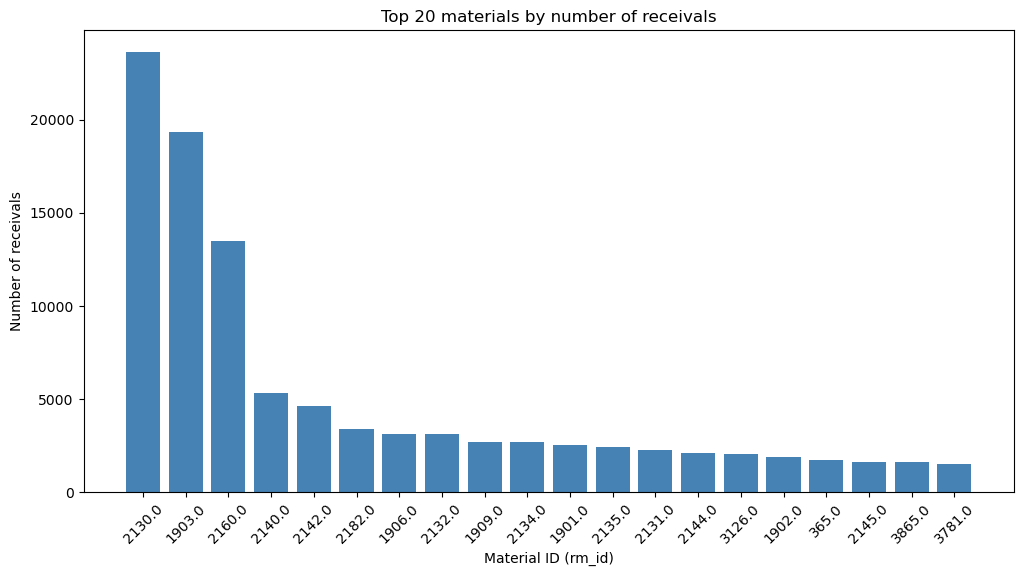

In [8]:
# Count how many times each material appears
rm_counts = receivals["rm_id"].value_counts().reset_index()
rm_counts.columns = ["rm_id", "count"]

# Select the top 20 most frequent materials
top20 = rm_counts.head(20)

# Create the plot
plt.figure(figsize=(12,6))
plt.bar(top20["rm_id"].astype(str), top20["count"], color="steelblue")
plt.title("Top 20 materials by number of receivals")
plt.xlabel("Material ID (rm_id)")
plt.ylabel("Number of receivals")
plt.xticks(rotation=45)
plt.show()


In [9]:
# How many materials occur less than 10 times
less_than_10 = (rm_counts["count"] < 10).sum()
print(f"Number of materials that occur less than 10 times: {less_than_10}")

Number of materials that occur less than 10 times: 81


In [10]:
# Mean, median, and mode of the counts
mean_count = rm_counts["count"].mean()
median_count = rm_counts["count"].median()
mode_count = rm_counts["count"].mode()[0]

print(f"Mean count: {round(mean_count, 2)}")
print(f"Median count: {median_count}")
print(f"Mode count: {mode_count}")

Mean count: 603.61
Median count: 21.0
Mode count: 1


In [11]:
# Find share of total receivals for top N materials
rm_counts = receivals["rm_id"].value_counts().reset_index()
rm_counts.columns = ["rm_id", "count"]

shares = []
for n in range(5, 55, 5):
    topn = rm_counts.head(n)
    share_topn = topn["count"].sum() / receivals.shape[0] * 100
    shares.append({"Top N": n, "Share %": share_topn})

shares_df = pd.DataFrame(shares)
print(shares_df)

   Top N    Share %
0      5  54.191206
1     10  66.391223
2     15  75.727221
3     20  82.561383
4     25  87.565870
5     30  90.961742
6     35  93.253120
7     40  94.748348
8     45  95.857737
9     50  96.727302


### When were materials received?

Clear difference between pre and post november 2011

Text(0, 0.5, 'Material ID (rm_id)')

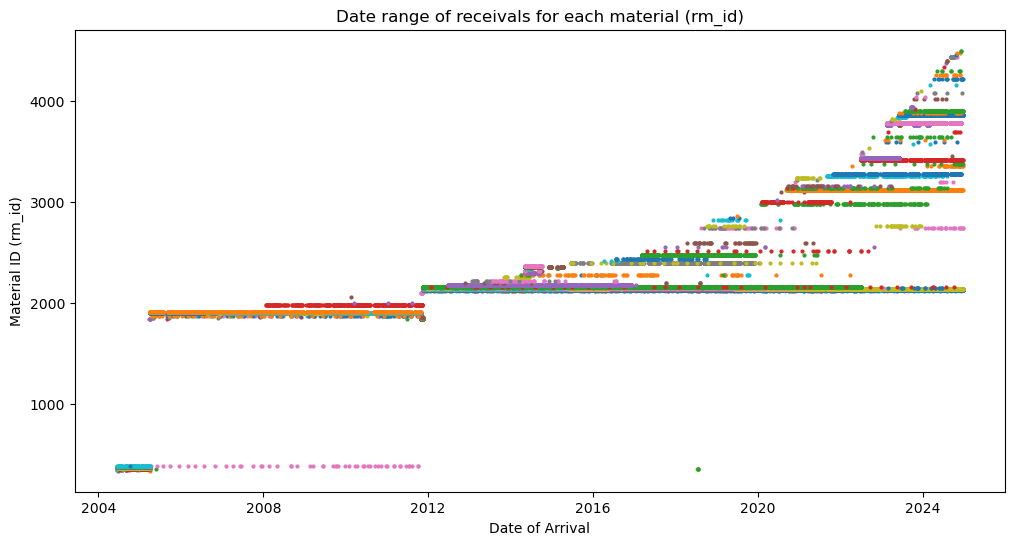

In [12]:
# Plot date range of receivals for each material
plt.figure(figsize=(12,6))
for rm_id, group in receivals.groupby("rm_id"):
    plt.plot(group["date_arrival"], [rm_id]*len(group), marker='o', linestyle='', markersize=2) 
plt.title("Date range of receivals for each material (rm_id)")
plt.xlabel("Date of Arrival")
plt.ylabel("Material ID (rm_id)")

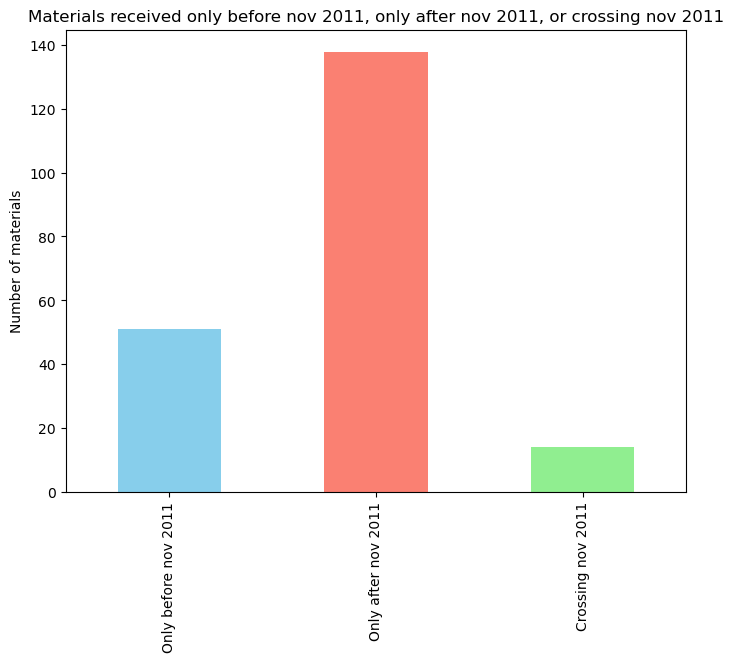

In [13]:
# Amount of materials received only before nov 2011 and only in or after nov 2011
material_ranges = receivals.groupby("rm_id")["date_arrival"].agg(['min', 'max']).reset_index()

only_before_nov_2011 = (material_ranges['max'] < pd.Timestamp('2011-11-01', tz='UTC')).sum()
only_after_nov_2011 = (material_ranges['min'] >= pd.Timestamp('2011-11-01', tz='UTC')).sum()
crossing_nov_2011 = ((material_ranges['min'] < pd.Timestamp('2011-11-01', tz='UTC')) & (material_ranges['max'] >= pd.Timestamp('2011-11-01', tz='UTC'))).sum()

counts = pd.Series([only_before_nov_2011, only_after_nov_2011, crossing_nov_2011], index=['Only before nov 2011', 'Only after nov 2011', 'Crossing nov 2011'])

counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], figsize=(8,6))
plt.title("Materials received only before nov 2011, only after nov 2011, or crossing nov 2011")
plt.ylabel("Number of materials")
plt.show()

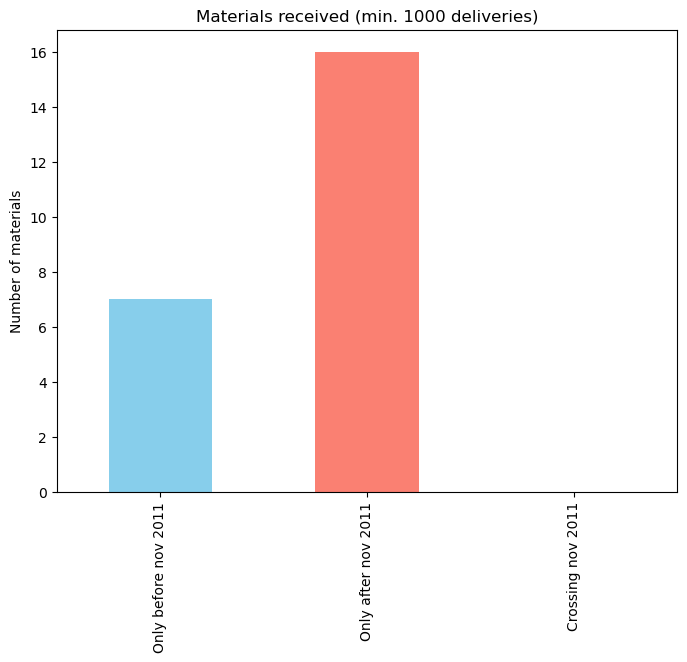

In [14]:
# Same plot as above, but only for materials with more than 1000 deliveries

# Add delivery counts
material_counts = receivals.groupby("rm_id")["date_arrival"].count().reset_index(name="n_deliveries")
material_ranges = material_ranges.merge(material_counts, on="rm_id")

# Filter
material_ranges_filtered = material_ranges[material_ranges["n_deliveries"] > 1000]

# Recalculate categories
only_before_nov_2011 = (material_ranges_filtered["max"] < pd.Timestamp("2011-11-01", tz="UTC")).sum()
only_after_nov_2011 = (material_ranges_filtered["min"] >= pd.Timestamp("2011-11-01", tz="UTC")).sum()
crossing_nov_2011 = ((material_ranges_filtered["min"] < pd.Timestamp("2011-11-01", tz="UTC")) &
                 (material_ranges_filtered["max"] >= pd.Timestamp("2012-01-01", tz="UTC"))).sum()

counts_filtered = pd.Series(
    [only_before_nov_2011, only_after_nov_2011, crossing_nov_2011],
    index=["Only before nov 2011", "Only after nov 2011", "Crossing nov 2011"]
)

# Plot
counts_filtered.plot(kind="bar", color=["skyblue", "salmon", "lightgreen"], figsize=(8,6))
plt.title("Materials received (min. 1000 deliveries)")
plt.ylabel("Number of materials")
plt.show()


In [15]:
# What is average "lifespan" of receivals for materials

material_ranges["lifespan_days"] = (material_ranges["max"] - material_ranges["min"]).dt.days

avg_lifespan = material_ranges["lifespan_days"].mean()

print(f"Average timespan for a material to be received: {avg_lifespan:.1f} days (~{avg_lifespan/365:.1f} years)")

Average timespan for a material to be received: 1103.3 days (~3.0 years)


In [16]:
# List start and end dates for materials with more than 1000 deliveries

# Count deliveries per material
material_counts = receivals.groupby("rm_id")["date_arrival"].count().reset_index(name="n_deliveries")

# Get min and max dates per material
material_ranges = receivals.groupby("rm_id")["date_arrival"].agg(["min", "max"]).reset_index()

# Merge counts with date ranges
material_info = material_ranges.merge(material_counts, on="rm_id")

# Filter: only materials with > 1000 deliveries
material_info_filtered = material_info[material_info["n_deliveries"] > 1000]

print(material_info_filtered)
print()
print(f"Total materials with > 1000 deliveries: {len(material_info_filtered)}")

      rm_id                       min                       max  n_deliveries
14    365.0 2004-06-15 11:34:00+00:00 2005-03-30 13:42:00+00:00          1722
53   1901.0 2005-03-31 11:26:00+00:00 2011-10-27 06:47:00+00:00          2560
54   1902.0 2005-03-31 08:18:00+00:00 2011-10-26 08:39:00+00:00          1892
55   1903.0 2005-03-30 13:39:00+00:00 2011-10-27 07:51:00+00:00         19337
56   1904.0 2005-04-01 09:12:00+00:00 2011-10-26 08:39:00+00:00          1484
58   1906.0 2005-03-31 11:16:00+00:00 2011-10-26 09:17:00+00:00          3112
61   1909.0 2005-03-31 06:53:00+00:00 2011-10-25 08:11:00+00:00          2697
75   2130.0 2011-11-15 11:20:00+00:00 2024-12-19 10:23:00+00:00         23621
76   2131.0 2011-11-14 08:15:00+00:00 2024-12-11 08:53:00+00:00          2284
77   2132.0 2011-11-14 08:15:00+00:00 2024-12-17 09:28:00+00:00          3100
79   2134.0 2011-11-17 09:33:00+00:00 2024-12-19 10:23:00+00:00          2677
80   2135.0 2011-11-16 08:36:00+00:00 2024-12-18 12:45:00+00:00 

### Time between receivals for top materials

Shows that all the top materials are received very often

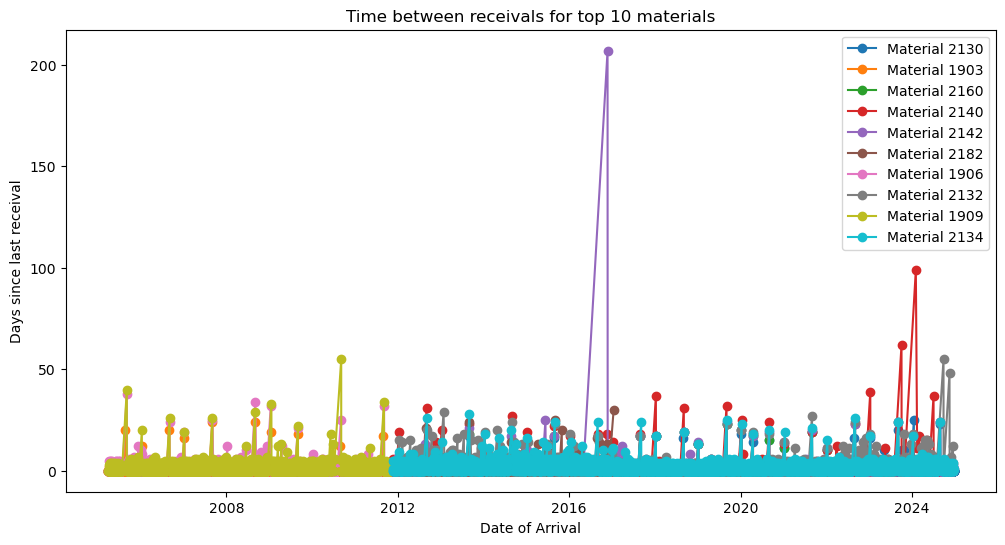

    rm_id  mode_days  mean_days
0  2130.0        0.0   0.081033
1  1903.0        0.0   0.046649
2  2160.0        0.0   0.112172
3  2140.0        0.0   0.576376
4  2142.0        0.0   0.664576
5  2182.0        0.0   0.287622
6  1906.0        0.0   0.497268
7  2132.0        0.0   1.156179
8  1909.0        0.0   0.597923
9  2134.0        0.0   1.368460


In [17]:
# Plot time between receivals for top K materials, one line per material
K = 10
top_k_materials = receivals["rm_id"].value_counts().nlargest(K).index  
plt.figure(figsize=(12,6))
for rm_id in top_k_materials:
    material_df = receivals[receivals["rm_id"] == rm_id].sort_values("date_arrival")
    time_diff_days = material_df["date_arrival"].diff().dt.days
    plt.plot(material_df["date_arrival"], time_diff_days, marker='o', linestyle='-', label=f"Material {int(rm_id)}")
plt.title(f"Time between receivals for top {K} materials")
plt.xlabel("Date of Arrival")
plt.ylabel("Days since last receival")
plt.legend()
plt.show()

# Mode, average of time between receivals for top K materials
time_stats = []
for rm_id in top_k_materials:
    material_df = receivals[receivals["rm_id"] == rm_id].sort_values("date_arrival")
    time_diff_days = material_df["date_arrival"].diff().dt.days.dropna()
    if not time_diff_days.empty:
        mode_days = time_diff_days.mode()[0]
        mean_days = time_diff_days.mean()
        time_stats.append({"rm_id": rm_id, "mode_days": mode_days, "mean_days": mean_days})
time_stats_df = pd.DataFrame(time_stats)
print(time_stats_df)

### Trend and seasonality for top materials

## Analyze net weight values

### Distribution of total weight per material

Shows that many materials have "low" total weight

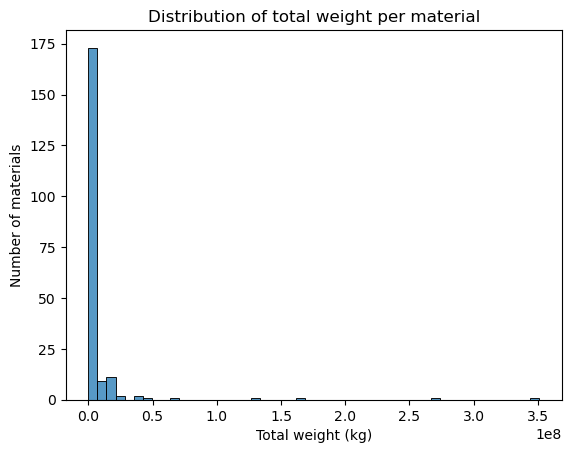

In [18]:
# Distribution of total weight per material

total_weight_all = receivals.groupby("rm_id")["net_weight"].sum()

sns.histplot(total_weight_all, bins=50)
plt.title("Distribution of total weight per material")
plt.xlabel("Total weight (kg)")
plt.ylabel("Number of materials")
plt.show()


### Top 20 materials based on total quantity delivered

Like seen before, a few materials have much higher total values

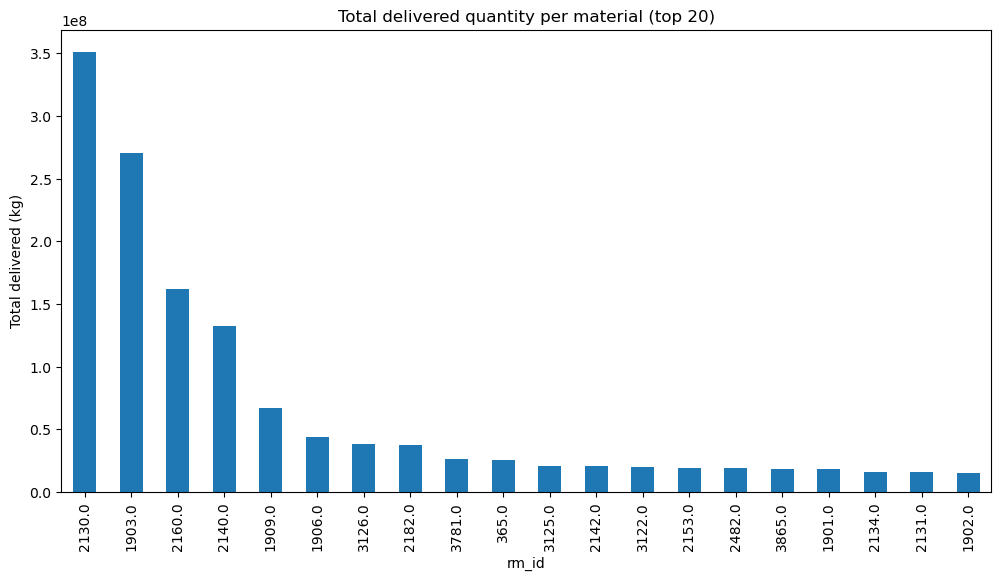

In [19]:
total_weight = receivals.groupby("rm_id")["net_weight"].sum().sort_values(ascending=False).head(20)

total_weight.plot(kind="bar", figsize=(12,6))
plt.title("Total delivered quantity per material (top 20)")
plt.xlabel("rm_id")
plt.ylabel("Total delivered (kg)")
plt.show()


### Number of Receivals vs Total weight

Looks like a natural distribution

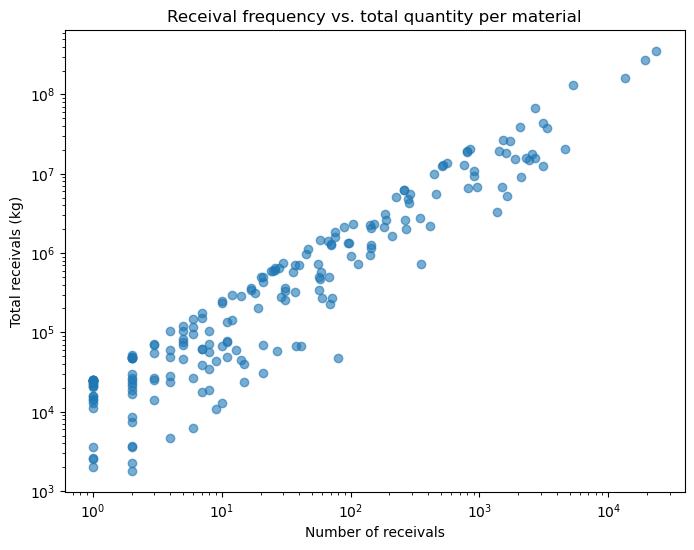

In [20]:
summary = receivals.groupby("rm_id").agg(
    total_weight=("net_weight", "sum"),
    n_deliveries=("rm_id", "count")
).reset_index()

plt.figure(figsize=(8,6))
plt.scatter(summary["n_deliveries"], summary["total_weight"], alpha=0.6)
plt.xlabel("Number of receivals")
plt.ylabel("Total receivals (kg)")
plt.title("Receival frequency vs. total quantity per material")
plt.xscale("log")  # often log-scale is better here
plt.yscale("log")
plt.show()


In [21]:
# Check date_arrival missing values and format differences
print("Missing values in date_arrival:", receivals["date_arrival"].isnull().sum())
print("Unique date formats in date_arrival:", receivals["date_arrival"].apply(lambda x: len(str(x).split('-')) if pd.notnull(x) else 0).nunique())

# Check the range of dates in date_arrival
print(receivals["date_arrival"].min())
print(receivals["date_arrival"].max())  

Missing values in date_arrival: 0
Unique date formats in date_arrival: 1
2004-06-15 11:34:00+00:00
2024-12-19 13:36:00+00:00


### Cumulative net weight values

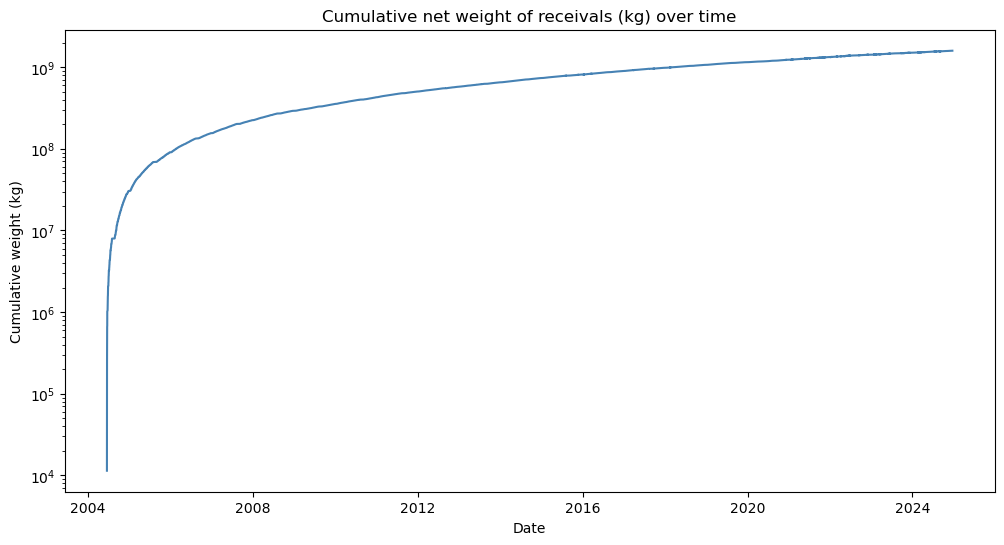

In [22]:
# Plot cumulative net weight of receivals over time 
receivals = receivals.sort_values("date_arrival")

receivals["cumulative_weight"] = receivals["net_weight"].cumsum()

plt.figure(figsize=(12,6))
plt.plot(receivals["date_arrival"], receivals["cumulative_weight"], color="steelblue")
plt.title("Cumulative net weight of receivals (kg) over time")
plt.xlabel("Date")
plt.ylabel("Cumulative weight (kg)")
plt.yscale("log")
plt.show() 

### Monthly trend net weight

A clear monthly trend can be seen

/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_70262/1490055935.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trend = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()


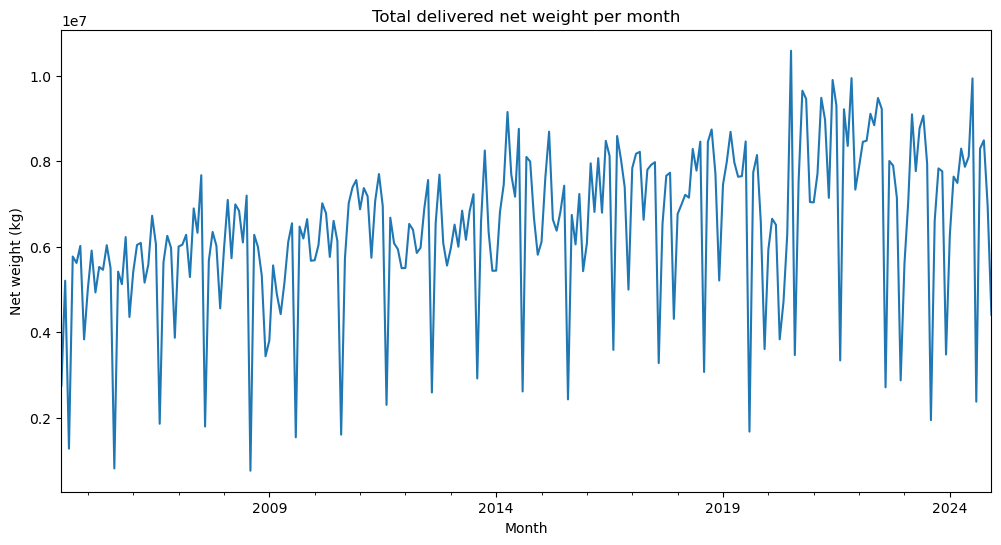

In [23]:
# Plot monthly trend of total net weight received

trend = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()

trend.plot(figsize=(12,6))
plt.title("Total delivered net weight per month")
plt.xlabel("Month")
plt.ylabel("Net weight (kg)")
plt.show()


### Seasonality net weight

Shows that August has lower average than the rest.

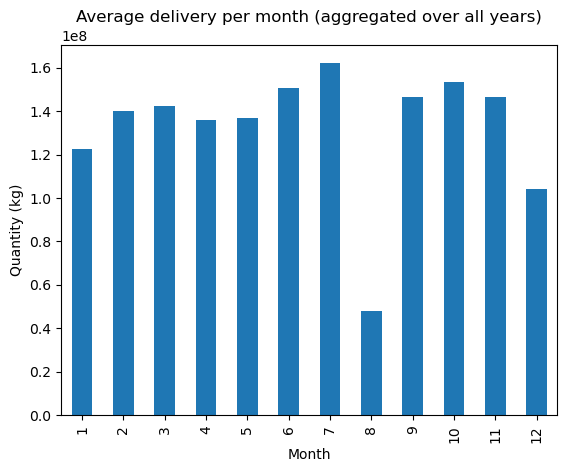

In [24]:
# Analyze seasonality by month

receivals["month"] = receivals["date_arrival"].dt.month

seasonality = receivals.groupby("month")["net_weight"].sum()

seasonality.plot(kind="bar")
plt.title("Average delivery per month (aggregated over all years)")
plt.xlabel("Month")
plt.ylabel("Quantity (kg)")
plt.show()


### Check for outliers in net weight

Looks like there are no outliers

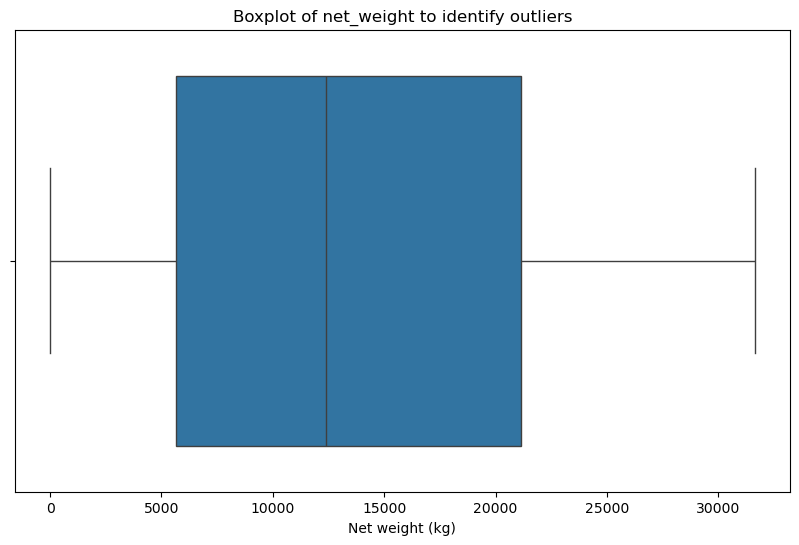

In [25]:
# Plot outliers in net_weight
plt.figure(figsize=(10,6))
sns.boxplot(x=receivals["net_weight"], showfliers=True)
plt.title("Boxplot of net_weight to identify outliers")
plt.xlabel("Net weight (kg)")
plt.show()

In [26]:
# Double check no outliers 
Q1 = receivals["net_weight"].quantile(0.25)
Q3 = receivals["net_weight"].quantile(0.75)
IQR = Q3 - Q1

outliers = receivals[
    (receivals["net_weight"] < Q1 - 1.5 * IQR) | 
    (receivals["net_weight"] > Q3 + 1.5 * IQR)
]
print(outliers.head())

print("Lower bound for net weight:", receivals["net_weight"].min())
print("Upper bound for net weight:", receivals["net_weight"].max())

Empty DataFrame
Columns: [rm_id, product_id, purchase_order_id, purchase_order_item_no, receival_item_no, batch_id, date_arrival, receival_status, net_weight, supplier_id, cumulative_weight, month]
Index: []
Lower bound for net weight: 0.0
Upper bound for net weight: 31626.0


### Moving averages of receivals (net weights)

/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_70262/2832938944.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()


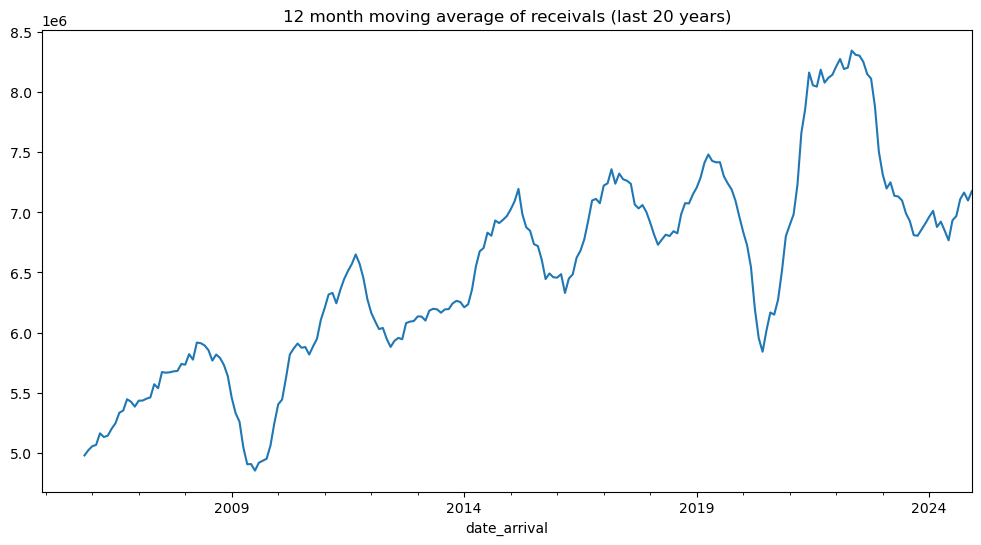

In [27]:
monthly = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()
monthly = monthly.to_timestamp()

last_20 = monthly[monthly.index >= (monthly.index.max() - pd.DateOffset(years=20))]

last_20.rolling(12).mean().plot(figsize=(12,6))
plt.title("12 month moving average of receivals (last 20 years)")
plt.show()



/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_70262/3275297737.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()


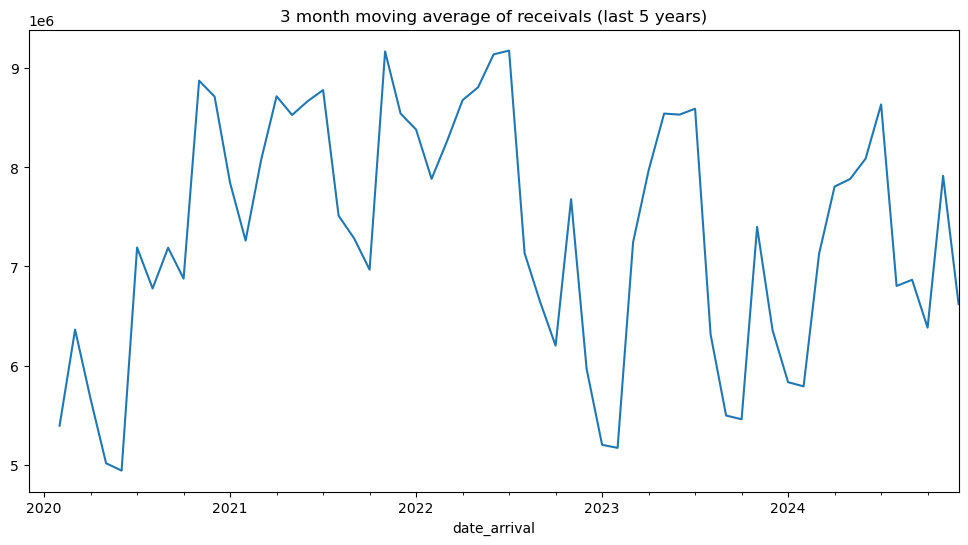

In [28]:
monthly = receivals.groupby(receivals["date_arrival"].dt.to_period("M"))["net_weight"].sum()
monthly = monthly.to_timestamp()

last_5 = monthly[monthly.index >= (monthly.index.max() - pd.DateOffset(years=5))]

last_5.rolling(3).mean().plot(figsize=(12,6))
plt.title("3 month moving average of receivals (last 5 years)")
plt.show()

### Trends for top 5 materials

2 out of 5 of the most received materials (net weight) havent been received since 2012

/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_70262/802541046.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  receivals.groupby([receivals["date_arrival"].dt.to_period("M"), "rm_id"])["net_weight"]


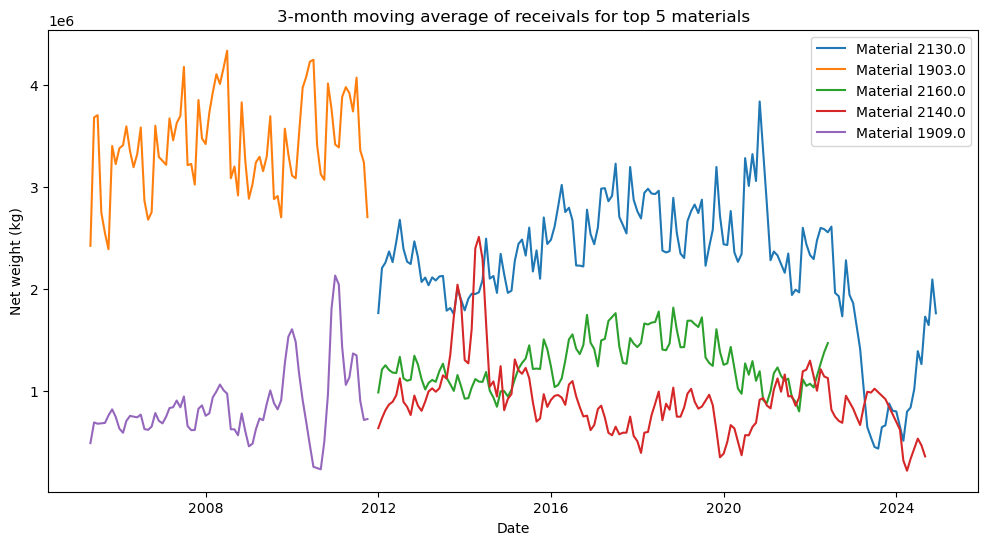

In [29]:
# Plot for top 5 most received materials over time
top_5_materials = receivals.groupby("rm_id")["net_weight"].sum().nlargest(5).index

monthly_trends = receivals[receivals["rm_id"].isin(top_5_materials)]

monthly = (
    receivals.groupby([receivals["date_arrival"].dt.to_period("M"), "rm_id"])["net_weight"]
    .sum()
    .reset_index()
)

monthly["date_arrival"] = monthly["date_arrival"].dt.to_timestamp()

plt.figure(figsize=(12,6))
for rm_id in top_5_materials:
    material_data = monthly[monthly["rm_id"] == rm_id]
    plt.plot(material_data["date_arrival"], material_data["net_weight"].rolling(3).mean(), label=f"Material {rm_id}")
plt.title("3-month moving average of receivals for top 5 materials")
plt.xlabel("Date")
plt.ylabel("Net weight (kg)")
plt.legend()
plt.show()

### Distribution of receival weight

The KDE curves extend below zero because the Gaussian smoothing spreads beyond the actual data range, even though negative weights are not possible.

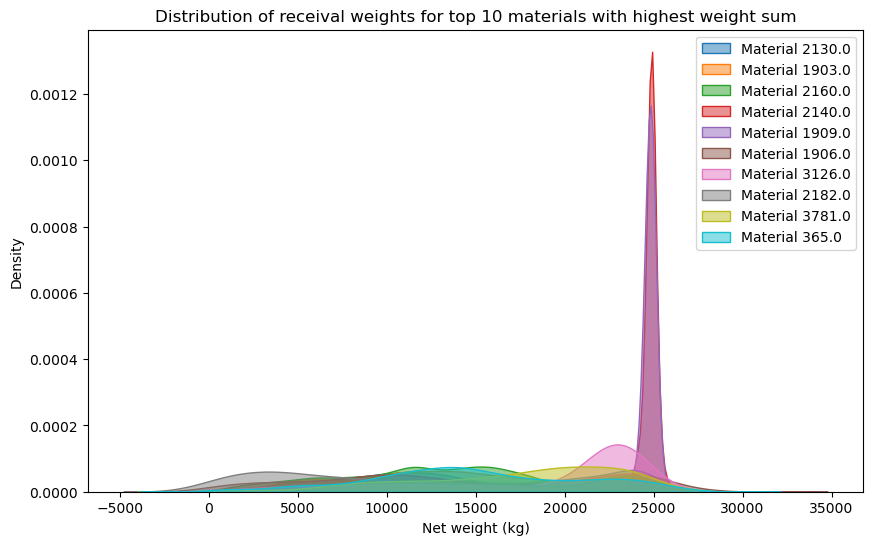

In [30]:
# Plot of distribution of receival weight for top 10 materials with highest weight sum
top_10_materials = receivals.groupby("rm_id")["net_weight"].sum().nlargest(10).index
plt.figure(figsize=(10,6))
for rm_id in top_10_materials:
    sns.kdeplot(receivals[receivals["rm_id"] == rm_id]["net_weight"], label=f"Material {rm_id}", fill=True, alpha=0.5)
plt.title("Distribution of receival weights for top 10 materials with highest weight sum")
plt.xlabel("Net weight (kg)")
plt.ylabel("Density")
plt.legend()    
plt.show()

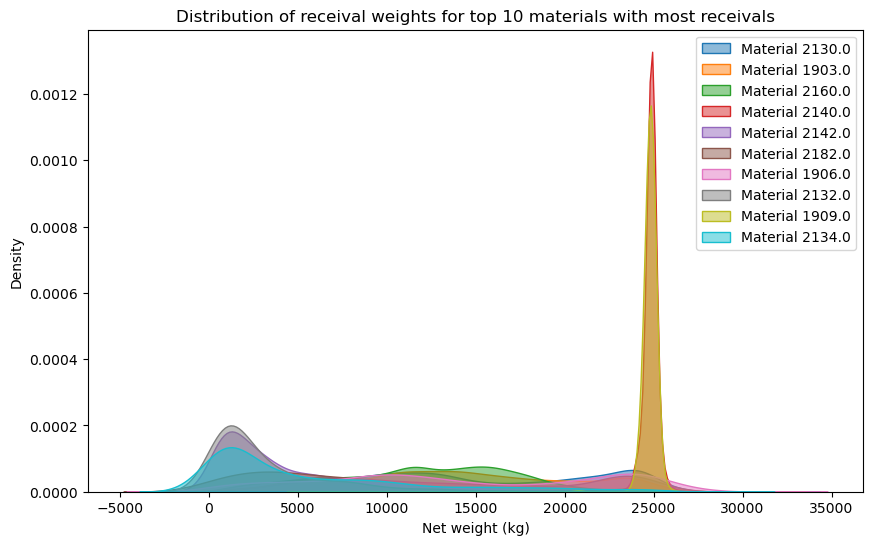

In [31]:
# Plot of distribution of receival weight for top 10 materials with most receivals
top_10_materials = receivals["rm_id"].value_counts().nlargest(10).index
plt.figure(figsize=(10,6))
for rm_id in top_10_materials:
    sns.kdeplot(receivals[receivals["rm_id"] == rm_id]["net_weight"], label=f"Material {rm_id}", fill=True, alpha=0.5)
plt.title("Distribution of receival weights for top 10 materials with most receivals")
plt.xlabel("Net weight (kg)")
plt.ylabel("Density")
plt.legend()    
plt.show()

## Correlation between materials

Are some materials received at the same time (periods)

/var/folders/25/zt8xvm6n49jczn1dmtg77nxc0000gn/T/ipykernel_70262/658555872.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .groupby([receivals["date_arrival"].dt.to_period("M"), "rm_id"])["net_weight"]


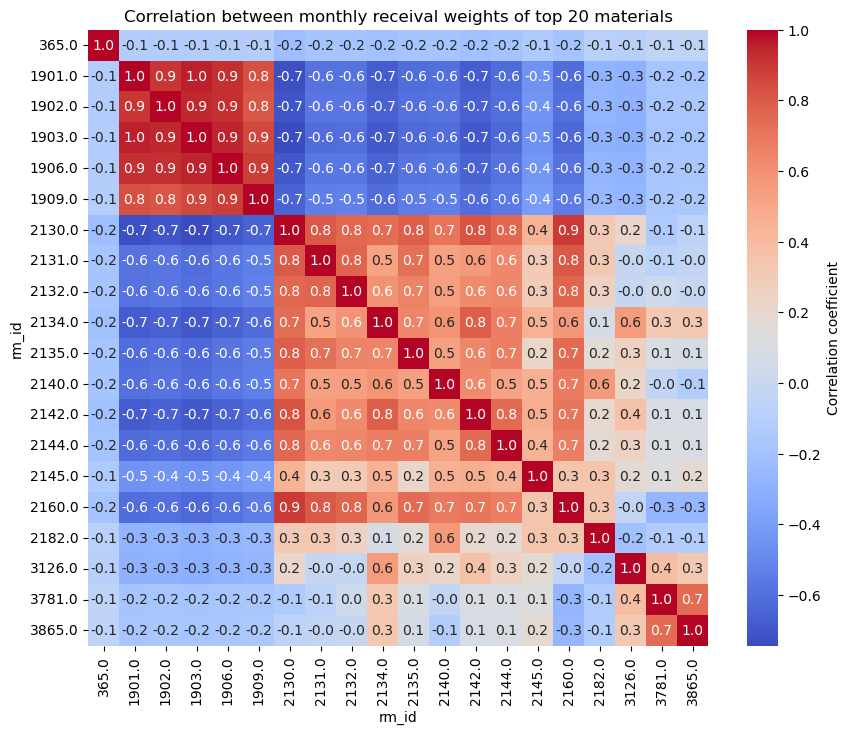

In [32]:
# Heatmap of correlation between monthly sum weights of top 20 materials
top_20_materials = receivals["rm_id"].value_counts().nlargest(20).index
monthly = (
    receivals[receivals["rm_id"].isin(top_20_materials)]
    .groupby([receivals["date_arrival"].dt.to_period("M"), "rm_id"])["net_weight"]
    .sum()
    .unstack(fill_value=0)
)
monthly.index = monthly.index.to_timestamp()
corr = monthly.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={"label": "Correlation coefficient"})
plt.title("Correlation between monthly receival weights of top 20 materials")
plt.show()

# Analyze Purchase Orders

## Data understanding

### Check for negative values 

6 orders with negative quantity?

In [33]:
# Check for negative values in quantity at purchase_orders
negative_quantities = purchase_orders[purchase_orders["quantity"] < 0]
print("Entries with negative quantities: ", len(negative_quantities))
print(negative_quantities)



Entries with negative quantities:  6
     purchase_order_id  purchase_order_item_no  quantity  \
0                    1                       1     -14.0   
59              205323                      10    -380.0   
60              205443                      10    -390.0   
61              206151                      10    -260.0   
66              206386                      10    -340.0   
208             209842                      10   -8580.0   

                delivery_date  product_id  product_version  \
0   2003-05-11 22:00:00+00:00    91900143                1   
59  2003-01-30 23:00:00+00:00        1024                1   
60  2003-02-09 23:00:00+00:00        1024                1   
61  2003-04-20 22:00:00+00:00        1024                1   
66  2003-05-13 22:00:00+00:00        1024                1   
208 2004-04-29 22:00:00+00:00    91900170                1   

            created_date_time        modified_date_time  unit_id unit  \
0   2003-05-12 10:00:48+00:00 2004

### Check unit values

In [34]:
# Check null values
print("Entries with null unit_id: ", purchase_orders["unit_id"].isnull().sum())
print("Entries with null unit: ", purchase_orders["unit"].isnull().sum())

# Check unique units and their counts
unit_counts = purchase_orders["unit"].value_counts()
print(unit_counts)


Entries with null unit_id:  44
Entries with null unit:  44
unit
KG      33120
PUND        7
Name: count, dtype: int64


### Distribution of status

In [35]:
# List unique statuses and their counts
status_counts = purchase_orders["status"].value_counts()
print(status_counts)

status
Closed     28780
Deleted     3191
Open        1200
Name: count, dtype: int64


### Number of receivals per status (Join with receivals data)

In [36]:
# Link the different statuses to receivals data and list how many receivals correspond to each status
# The receivals data and purchase_orders data can be linked via the purchase_order_id field
receivals_linked = pd.merge(receivals, purchase_orders[["purchase_order_id", "purchase_order_item_no", "status"]], on=["purchase_order_id", "purchase_order_item_no"], how="left")
status_receivals_counts = receivals_linked["status"].value_counts()
print(status_receivals_counts)


status
Closed     120426
Open         1885
Deleted       226
Name: count, dtype: int64


### How much of an order is received?

In [42]:
# Join with receivals data to see how much of an order is actually received
# Plot difference between ordered quantity and received quantity
outer_link = pd.merge(purchase_orders, receivals, on=["purchase_order_id", "purchase_order_item_no"], how="outer", suffixes=('_order', '_receival'))
    
order_summary = outer_link.groupby(["purchase_order_id", "purchase_order_item_no"]).agg(
    ordered_quantity=("quantity", "first"),
    received_quantity=("net_weight", "sum"),
    status=("status", "first")
).reset_index()

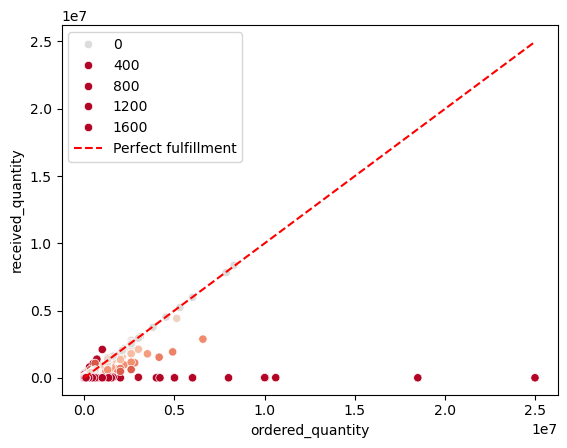

In [38]:
order_summary["diff"] = order_summary["received_quantity"] - order_summary["ordered_quantity"]
order_summary["abs_diff"] = order_summary["diff"].abs()
order_summary["relative_diff"] = order_summary["abs_diff"] / order_summary["ordered_quantity"].replace(0, np.nan)   

sns.scatterplot(
    data=order_summary,
    x="ordered_quantity", 
    y="received_quantity", 
    hue="relative_diff",  # avvik i prosent
    palette="coolwarm", 
    hue_norm=(-1, 1)  # -100% til +100%
)
plt.plot([0, order_summary["ordered_quantity"].max()],
         [0, order_summary["ordered_quantity"].max()],
         "r--", label="Perfect fulfillment")
plt.legend()

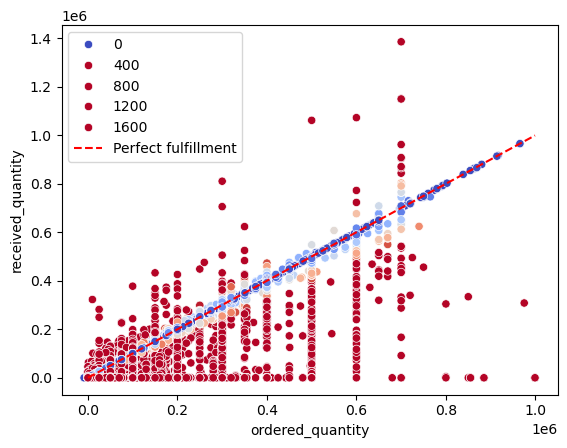

In [39]:
subset = order_summary[order_summary["ordered_quantity"] < 1e6]

sns.scatterplot(
    data=subset,
    x="ordered_quantity", 
    y="received_quantity", 
    hue="relative_diff",  # avvik i prosent
    palette="coolwarm", 
    hue_norm=(0, 0.2)  # -100% til +100%
)
plt.plot([0, subset["ordered_quantity"].max()],
         [0, subset["ordered_quantity"].max()],
         "r--", label="Perfect fulfillment")
plt.legend()

In [40]:
# List how many receivals are within 5% of ordered quantity, and 10%, 50% etc.
order_summary["relative_diff_pct"] = order_summary["relative_diff"] * 100

thresholds = [5, 10, 20, 50, 100]   

results = []
total = len(order_summary.dropna(subset=["relative_diff"]))

for threshold in thresholds:
    count = order_summary[order_summary["relative_diff_pct"].abs() <= threshold].shape[0]
    results.append((threshold, count, count / total * 100 if total > 0 else 0))
    
results_df = pd.DataFrame(results, columns=["Threshold (%)", "Count", "Share (%)"])
print(results_df)


   Threshold (%)  Count  Share (%)
0              5  12384  37.338318
1             10  13870  41.818675
2             20  15572  46.950282
3             50  18409  55.503965
4            100  32939  99.312570


### How many orders arent received, and are they deleted or open?

In [48]:
link = pd.merge(
    purchase_orders,
    receivals,
    on=["purchase_order_id", "purchase_order_item_no"],
    how="left",                            
    suffixes=('_order', '_receival')
)

order_summary = link.groupby(["purchase_order_id", "purchase_order_item_no"]).agg(
    ordered_quantity = ("quantity", "first"),     
    received_quantity = ("net_weight", lambda s: s.sum(min_count=1)), 
    status = ("status", "first")
).reset_index()

not_received = order_summary[order_summary["received_quantity"].isna()]
not_received_count = len(not_received)

deleted_count = (not_received["status"] == "Deleted").sum()
open_count = (not_received["status"] == "Open").sum()
other_count = not_received_count - deleted_count - open_count

print(f"Total orders not received: {not_received_count}")
print(f"Of these, deleted orders: {deleted_count} "
      f"({(deleted_count / not_received_count * 100) if not_received_count > 0 else 0:.1f}%)")
print(f"Of these, open orders: {open_count} "
      f"({(open_count / not_received_count * 100) if not_received_count > 0 else 0:.1f}%)")
print(f"Of these, other status: {other_count} "
      f"({(other_count / not_received_count * 100) if not_received_count > 0 else 0:.1f}%)")

print(order_summary.head(20))

Total orders not received: 10872
Of these, deleted orders: 3080 (28.3%)
Of these, open orders: 285 (2.6%)
Of these, other status: 7507 (69.0%)
    purchase_order_id  purchase_order_item_no  ordered_quantity  \
0                   1                       1             -14.0   
1                  22                       1           23880.0   
2                  41                       1               0.0   
3                  61                       1               0.0   
4                 141                      10           25000.0   
5                 161                      10            6000.0   
6                 161                      20           15000.0   
7                 361                      10          150000.0   
8                 361                      20          150000.0   
9                 361                      30          150000.0   
10                363                      10          150000.0   
11                363                      20        

### Remove orders without any receivals, and plot again: How much of an order is received?